In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

El dataset que vamos a utilizar tiene como objetivo determinar si una empresa va quebrar o no el próximo año en función de algunos ratios financieros. El modelo original está inspirado en el z-score de Altman.

```WC/TA```: Ratio of Working Capital to Total Assets (Capital circulante / activos totales). Mide los activos líquidos en relación con el tamaño de la empresa.

```RE/TA```: Ratio of Retained Earnings to Total Assets (Ganancias retenidas / activos totales). Mide la rentabilidad y refleja la capacidad de obtener ganancias.

```EBIT/TA```: Ratio of Earnings Before Interest and Taxes to Total Assets (Ganancias antes de impuestos / activos totales). Reconoce la importancia de las ganancias operativas para la viabilidad a largo plazo.

```S/TA```: Ratio of Sales to Total Assets (Ventas / activos totales). Medida estándar de la rotación de activos.

```BVE/BVL```: Ratio of Market Value Equality / Book Value of total Liabilities (Capitalización bursátil sobre el valor contable del pasivo total). Añade una dimensión de mercado que puede mostrar una fluctuación del precio como señal de alarma.

Ver más detalles en:
https://en.wikipedia.org/wiki/Altman_Z-score

In [9]:
# Descargamos el dataset del Github que estamos utilizando
bankrupt = pd.read_csv("https://raw.githubusercontent.com/christianolivamoya/MIAX11-ML/main/data/bankruptcy.csv", index_col='Company')
bankrupt.sample(5)

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,
Rhythms NetConnections,47.0,-78.2,-42.0,4.4,0.168,yes
GST Telecom,6.6,-50.9,-2.6,28.9,0.258,yes
Openwave Systems,20.3,-61.3,1.9,27.0,35.178,no
CenturyTel,-5.7,21.1,14.3,28.9,1.153,no
IDT Corp.,48.7,38.4,-9.2,65.4,0.705,no


Cargamos los datos de input (X) y el target (Y)

In [11]:
x = bankrupt.loc[:, bankrupt.columns != 'Bankrupt']
y = bankrupt.Bankrupt

## Visualización de los datos

Como siempre, es interesante intentar obtener toda la información posible de los datos antes de empezar a trabajar con ellos. Para ello, lo primero que siempre (o casi siempre) deberíamos hacer es intentar comprender la distribución de la información de la que disponemos. Vamos a utilizar la función `sns.pairplot` para obtener un primer vistazo.

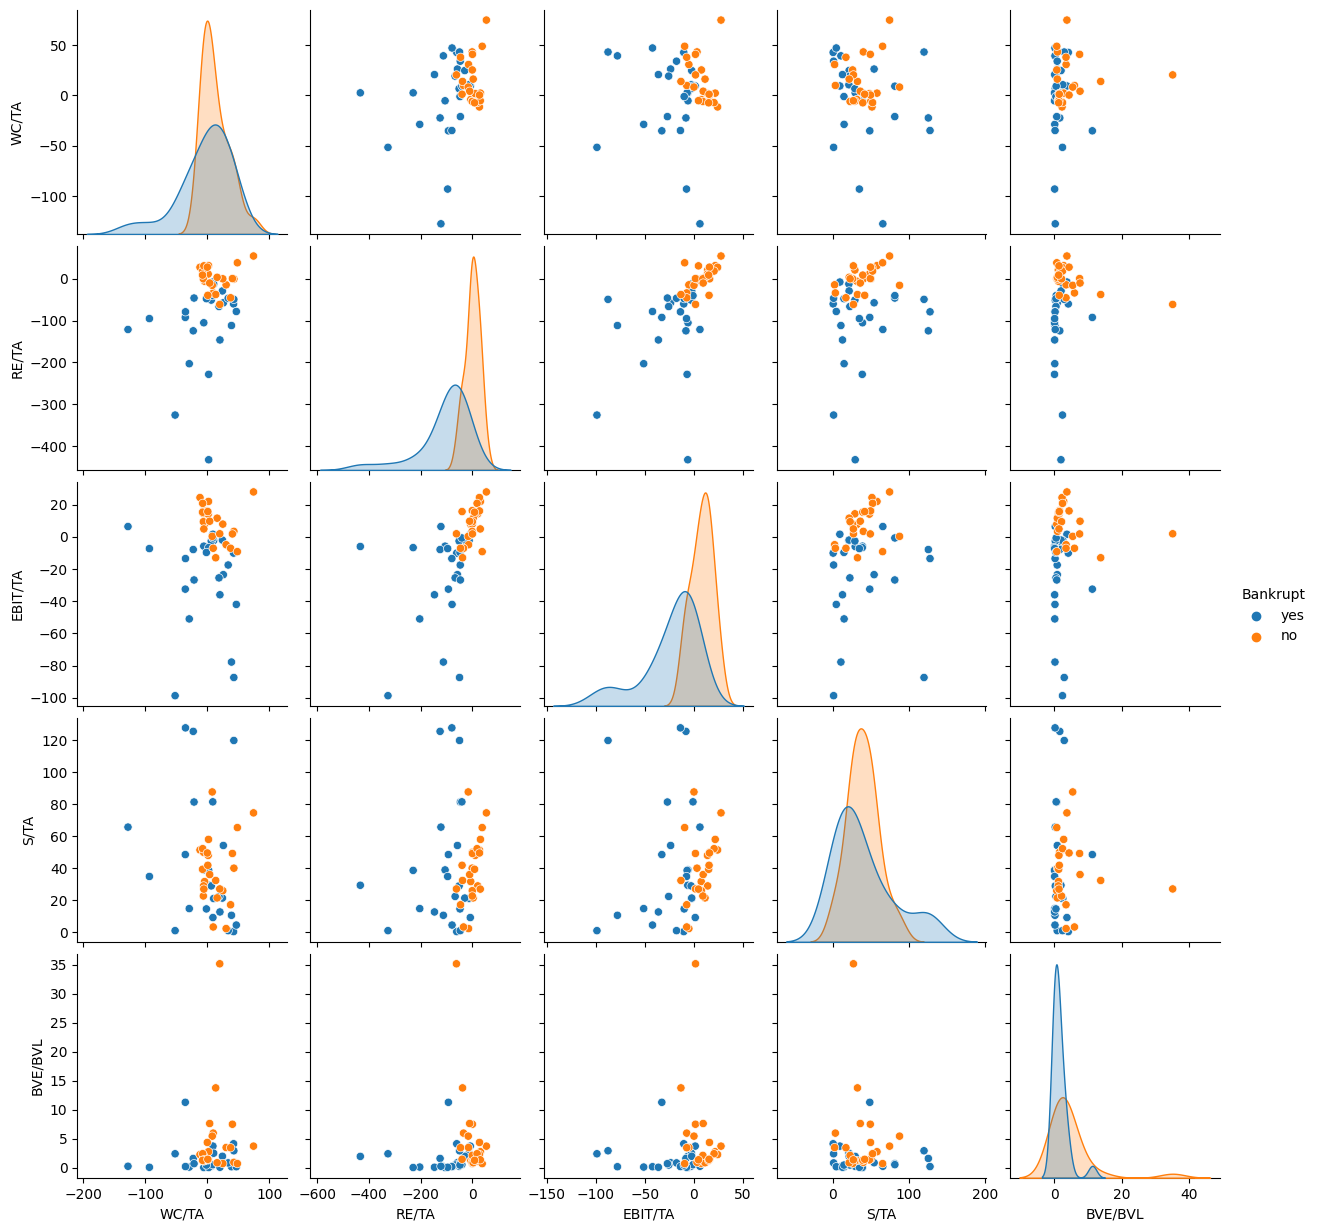

In [15]:
sns.pairplot(bankrupt, hue="Bankrupt")
plt.show()

# Entrenamiento del árbol

Explora los parámetros `min_samples_leaf` y `max_depth` para comprender las diferencias de los árboles resultantes.

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [17]:
dTree = DecisionTreeClassifier()
_ = dTree.fit(x, y)

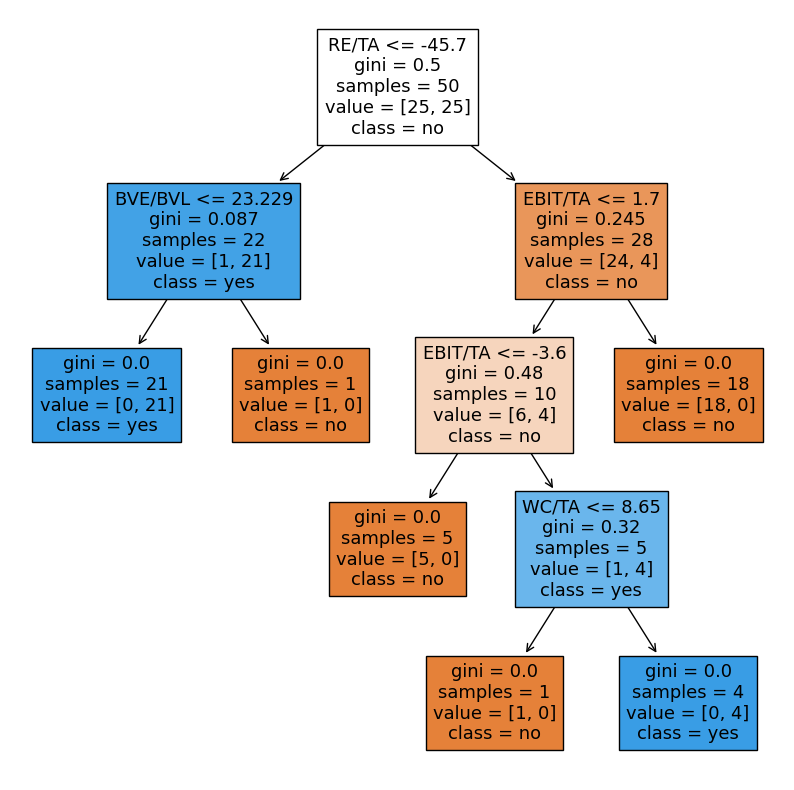

In [18]:
plt.figure(figsize=(10,10))
plot_tree(dTree,
          feature_names=x.columns,
          class_names=dTree.classes_,
          filled=True
          )
plt.show()

In [19]:
dTree.score(x, y)

1.0

**Pregunta**: ¿Qué está pasando? ¿Tenemos realmente un modelo que tiene un 100% de acierto?

In [21]:
from sklearn.model_selection import train_test_split

# TO-DO Hagamos el ejercicio entre todos